In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
import keras as kp

In [3]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

In [4]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape, GlobalAveragePooling1D
from keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D
from keras.utils import np_utils

In [6]:
df=pd.read_csv("WISDM_ar_v1.1_raw.txt", header=None, names=['user-id',
                    'activity',
                    'timestamp',
                    'x-axis',
                    'y-axis',
                    'z-axis'], on_bad_lines='skip')

In [7]:
raw_data=df

In [8]:
data=raw_data.drop(columns='user-id')

In [9]:
data.tail()

activity        timestamp  x-axis  y-axis  z-axis
1086461  Sitting  131623331483000    9.00   -1.57    1.69
1086462  Sitting  131623371431000    9.04   -1.46    1.73
1086463  Sitting  131623411592000    9.08   -1.38    1.69
1086464  Sitting  131623491487000    9.00   -1.46    1.73
1086465  Sitting  131623531465000    8.88   -1.33    1.61

In [10]:
sample_rate=20

In [91]:
time_step=80 #Time step and step are equal in order to 
step=80

n_features=3
segments = []
labels = []
for i in range(0, len(df)-time_step, step): 
    xs = df['x-axis'].values[i: i + time_step]
    ys = df['y-axis'].values[i: i + time_step]
    zs = df['z-axis'].values[i: i + time_step]
    label = stats.mode(data['activity'][i: i + time_steps])[0][0]
    segments.append([xs, ys, zs])
    labels.append(label)
segments= np.asarray(segments, dtype= np.float32).reshape(-1, time_step, n_features)
labels = np.asarray(labels)

/var/folders/wv/c3g7vgxd10n0mdl2_flcjj480000gn/T/ipykernel_21867/2646011855.py:11: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label = stats.mode(data['activity'][i: i + time_steps])[0][0]
/var/folders/wv/c3g7vgxd10n0mdl2_flcjj480000gn/T/ipykernel_21867/2646011855.py:11: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  label = stats.mode(data['activity'][i: i + time_steps])[0][0]


In [55]:
segments

array([[[ -0.6946377 ,   5.012288  ,   4.903325  ],
        [ -0.61291564,  -1.1849703 ,   1.3756552 ],
        [ -0.61291564,  -0.50395286,  -8.430995  ],
        ...,
        [ -0.8036005 ,   4.2086873 ,  -4.3312707 ],
        [ 11.563675  ,   7.7363577 ,   3.6774938 ],
        [  0.9942854 ,  -1.56634   ,   6.742072  ]],

       [[  2.1111538 ,   4.2086873 ,  -5.134871  ],
        [  3.0237172 ,   2.070293  ,  -3.1054392 ],
        [ -4.399372  ,   4.7535014 ,  -0.6946377 ],
        ...,
        [  7.6273947 ,  -8.349273  ,   9.575105  ],
        [  2.2201166 ,   4.4810944 ,   0.08172209],
        [ -5.8567495 ,   7.1234417 ,  -9.112013  ]],

       [[ -5.012288  ,   1.920469  ,   2.7921712 ],
        [ -0.95342433, -10.079058  ,   4.372132  ],
        [ -1.3075534 ,   0.38136974,   3.1054392 ],
        ...,
        [  8.812365  ,  -0.27240697,  15.4046135 ],
        [ -3.7864566 ,   4.0180025 ,   2.3018389 ],
        [  3.3778462 ,   3.9090397 ,   3.7864566 ]],

       ...,

      

In [92]:
segments.shape

(13580, 80, 3)

In [89]:
labels.shape

(13580,)

In [15]:
segments=[]
for i in range(0, len(df), step): 
    xs = df['x-axis'].values[i: i + time_steps]
    ys = df['y-axis'].values[i: i + time_steps]
    zs = df['z-axis'].values[i: i + time_steps]
    label = stats.mode(data['activity'][i: i + time_steps])[0][0]
    segments.append([xs, ys, zs])

/var/folders/wv/c3g7vgxd10n0mdl2_flcjj480000gn/T/ipykernel_21867/212789101.py:6: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label = stats.mode(data['activity'][i: i + time_steps])[0][0]
/var/folders/wv/c3g7vgxd10n0mdl2_flcjj480000gn/T/ipykernel_21867/212789101.py:6: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  label = stats.mode(data['activity'][i: i + time_steps])[0][0]


In [16]:
pd.DataFrame(segments)

0  \
0      [-0.6946377, 5.012288, 4.903325, -0.61291564, ...   
1      [2.1111538, 4.2086873, -5.134871, 3.0237172, 2...   
2      [-5.012288, 1.920469, 2.7921712, -0.95342433, ...   
3      [11.073342, -3.8681788, 7.0553403, -8.730643, ...   
4      [6.2789803, -2.1383946, -2.5333846, 0.5720546,...   
...                                                  ...   
10860  [8.81, 8.73, 9.0, 9.11, 8.96, 9.04, 9.04, 8.81...   
10861  [8.92, 9.0, 8.96, 8.96, 8.96, 8.92, 8.92, 8.88...   
10862  [10.5, 8.73, 8.47, 8.43, 9.66, 9.43, 9.0, 8.77...   
10863  [8.92, 8.92, 8.88, 8.92, 9.0, 8.92, 8.88, 8.92...   
10864  [8.92, 8.92, 8.92, 8.96, 8.88, 8.88, 8.92, 8.9...   

                                                       1  \
0      [12.680544, 11.264028, 10.882658, 18.496431, 1...   
1      [0.27240697, 11.454713, 9.00305, 7.164303, 3.4...   
2      [13.021052, 15.785983, 3.1463003, 8.008764, 19...   
3      [6.1291566, 11.413852, 2.3018389, 19.531578, 6...   
4      [3.486809, 3.7864566, 19.57244, -6.742072, 19....   
...                                                  ...   
10860  [-0.95, -1.31, -0.57, -0.3, -0.19, -0.15, -0.5...   
10861  [-1.08, -1.04, -0.95, -1.04, -1.04, -0.99, -1....   
10862  [0.38, -0.61, -1.18, -1.46, -1.14, -1.14, -0.8...   
10863  [-1.31, -1.38, -1.38, -1.27, -1.23, -1.31, -1....   
10864  [-1.23, -1.18, -1.23, -1.27, -1.31, -1.33, -1....   

                                                       2  
0      [0.50395286, 0.95342433, -0.08172209, 3.023717...  
1      [2.6423476, 7.6273947, -3.173541, 0.08172209, ...  
2      [-5.7477865, 1.4165162, 1.4165162, -0.42223078...  
3      [-1.9477097, 5.2165933, 0.84446156, 0.38136974...  
4      [-0.08172209, -0.46309182, 6.742072, -4.521955...  
...                                                  ...  
10860  [2.22, 2.41, 2.64, 2.53, 2.49, 2.45, 2.37, 2.4...  
10861  [2.22, 2.37, 2.3, 2.3, 2.3, 2.26, 2.22, 2.34, ...  
10862  [2.53, 0.89, 1.12, 2.03, 1.46, 1.69, 1.65, 1.2...  
10863  [2.26, 2.18, 2.22, 2.18, 2.26, 2.26, 2.22, 2.2...  
10864  [2.34, 2.26, 2.3, 2.26, 2.22, 2.22, 2.22, 2.3,...  

[10865 rows x 3 columns]

In [57]:
segments.shape

(10864, 100, 3)

In [56]:
labels.shape

(10864,)

In [19]:
def create_segments_and_labels(df, time_steps, step, label_name):
    #df=Dataframe, time_steps=integer value of 
    #length of time segment
    n_features = 3
    # Number of steps to advance in each iteration (for me, it should always
    # be equal to the time_steps in order to have no overlap between segments)
    segments = []
    labels = []
    for i in range(0, len(df) - time_steps, step):
        xs = df['x-axis'].values[i: i + time_steps]
        ys = df['y-axis'].values[i: i + time_steps]
        zs = df['z-axis'].values[i: i + time_steps]
        # Retrieve the most often used label in this segment
        label = stats.mode(df[label_name][i: i + time_steps])[0][0]
        segments.append([xs, ys, zs])
        labels.append(label)

    # Bring the segments into a better shape
    reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, time_steps, n_features)
    labels = np.asarray(labels)

    return reshaped_segments, labels

In [20]:
reshaped_segments, labels=create_segments_and_labels(data, 240, 240, 'activity')

/var/folders/wv/c3g7vgxd10n0mdl2_flcjj480000gn/T/ipykernel_21867/1671356819.py:14: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label = stats.mode(df[label_name][i: i + time_steps])[0][0]
/Users/jaredperez/opt/miniconda3/envs/tf/lib/python3.10/site-packages/scipy/stats/_stats_py.py:112: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "
/var/folders/wv/c3g7vgxd10n0mdl2_flcjj480000gn/T/ipykernel_21867/1671356819.py:14: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will

In [21]:
stats.mode(df['activity'][i: i + time_steps])

/var/folders/wv/c3g7vgxd10n0mdl2_flcjj480000gn/T/ipykernel_21867/1371130292.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  stats.mode(df['activity'][i: i + time_steps])
/var/folders/wv/c3g7vgxd10n0mdl2_flcjj480000gn/T/ipykernel_21867/1371130292.py:1: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  stats.mode(df['activity'][i: i + time_steps])


ModeResult(mode=array(['Sitting'], dtype=object), count=array([66]))

In [22]:
reshaped_segments

array([[[ -0.6946377 ,   5.012288  ,   4.903325  ],
        [ -0.61291564,  -1.1849703 ,   1.3756552 ],
        [ -0.61291564,  -0.50395286,  -8.430995  ],
        ...,
        [-11.536434  ,  -8.812365  ,   4.2904096 ],
        [  2.2201166 ,   8.349273  ,   5.7886477 ],
        [ -9.888372  ,   1.7978859 ,  -1.334794  ]],

       [[-13.565866  ,  -0.88532263,  -4.5900574 ],
        [  1.334794  ,   0.08172209,  -2.4925237 ],
        [-12.762266  ,  -0.5720546 ,  -6.3198414 ],
        ...,
        [ -8.921328  ,   6.782933  ,   2.152015  ],
        [  2.3426998 , -13.211738  ,  10.61025   ],
        [  5.8567495 ,  -2.4516625 ,   5.09401   ]],

       [[ -1.1441092 , -11.182305  ,  -1.1168685 ],
        [ -8.049625  ,   8.281172  ,   4.9850473 ],
        [  3.636633  ,  -2.4925237 ,   4.7535014 ],
        ...,
        [ -2.5333846 ,  -0.38136974,  -1.4573772 ],
        [ 15.745122  ,  -3.636633  ,  -4.862464  ],
        [ -1.7297841 ,   1.2258313 ,   0.27240697]],

       ...,

      

In [23]:
labels

array(['Jogging', 'Jogging', 'Walking', ..., 'Sitting', 'Sitting',
       'Sitting'], dtype='<U10')

In [24]:
segments

[[array([-0.6946377 ,  5.012288  ,  4.903325  , -0.61291564, -1.1849703 ,
          1.3756552 , -0.61291564, -0.50395286, -8.430995  ,  0.95342433,
         -8.19945   ,  1.4165162 , -1.879608  , -6.1291566 ,  5.829509  ,
          6.2789803 , -1.56634   ,  3.5276701 , -2.0294318 ,  2.7649305 ,
          3.568531  , -0.50395286, -2.3018389 , -3.568531  , -0.8036005 ,
          0.50395286,  5.706926  , -8.662541  , -1.334794  , -4.5900574 ,
          3.8681788 , -1.7978859 ,  7.668256  , -2.3699405 ,  2.7240696 ,
         -3.5957718 ,  3.9499009 ,  0.46309182,  3.7864566 ,  3.336985  ,
          5.6660647 ,  0.23154591, -4.8216033 ,  1.8387469 , -3.2961242 ,
         11.604536  , -3.173541  ,  0.61291564, -7.8861814 ,  3.1463003 ,
         -3.0237172 , -0.08172209, -1.0351465 , -2.4516625 , -1.3756552 ,
         -2.4925237 ,  1.4573772 , -1.4165162 , -1.2666923 , -3.6774938 ,
          1.8387469 , -1.2666923 ,  2.4108016 , -0.61291564,  0.04086104,
         -7.6546354 , -1.2666923 , -5.

In [25]:
#Program to Load Data and Train The Model

pd.options.display.float_format = '{:.1f}'.format #Changed data display
sns.set() # Default seaborn look and feel
plt.style.use('ggplot')

Labels = ["Downstairs",
          "Jogging",
          "Sitting",
          "Standing",
          "Upstairs",
          "Walking"]
periods = 80
step_distance = 40

<AxesSubplot:title={'center':'Activity Type'}>

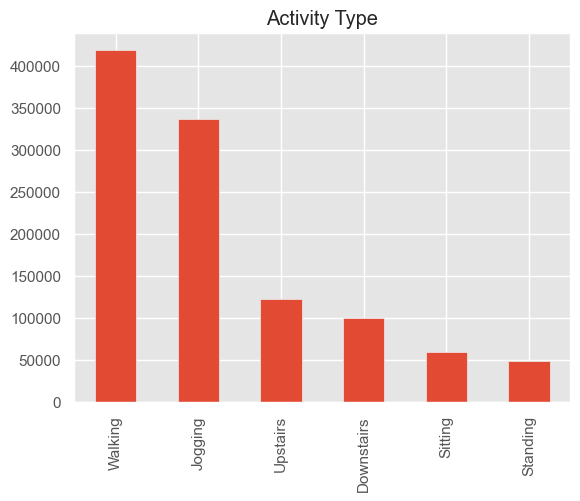

In [26]:
df['activity'].value_counts().plot(kind='bar', title='Activity Type')

In [27]:
def plot_activity(activity, data):

    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3,
         figsize=(15, 10),
         sharex=True)
    plot_axis(ax0, data['timestamp'], data['x-axis'], 'x-axis')
    plot_axis(ax1, data['timestamp'], data['y-axis'], 'y-axis')
    plot_axis(ax2, data['timestamp'], data['z-axis'], 'z-axis')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.90)
    plt.show()
    
def plot_axis(ax, x, y, title):

    ax.plot(x, y)
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)

In [28]:
np.unique(df['activity'])

array(['Downstairs', 'Jogging', 'Sitting', 'Standing', 'Upstairs',
       'Walking'], dtype=object)

In [29]:
df[df["activity"] == 'Jogging'][:180]

user-id activity       timestamp  x-axis  y-axis  z-axis
0         33  Jogging  49105962326000    -0.7    12.7     0.5
1         33  Jogging  49106062271000     5.0    11.3     1.0
2         33  Jogging  49106112167000     4.9    10.9    -0.1
3         33  Jogging  49106222305000    -0.6    18.5     3.0
4         33  Jogging  49106332290000    -1.2    12.1     7.2
..       ...      ...             ...     ...     ...     ...
175       33  Jogging  49124462295000     5.7     4.2     1.6
176       33  Jogging  49124572341000    -3.5     8.0    -0.6
177       33  Jogging  49124682296000     5.3    16.4     9.1
178       33  Jogging  49124792312000     0.1    -6.7    -7.5
179       33  Jogging  49124902297000    -6.6    17.0    -4.4

[180 rows x 6 columns]

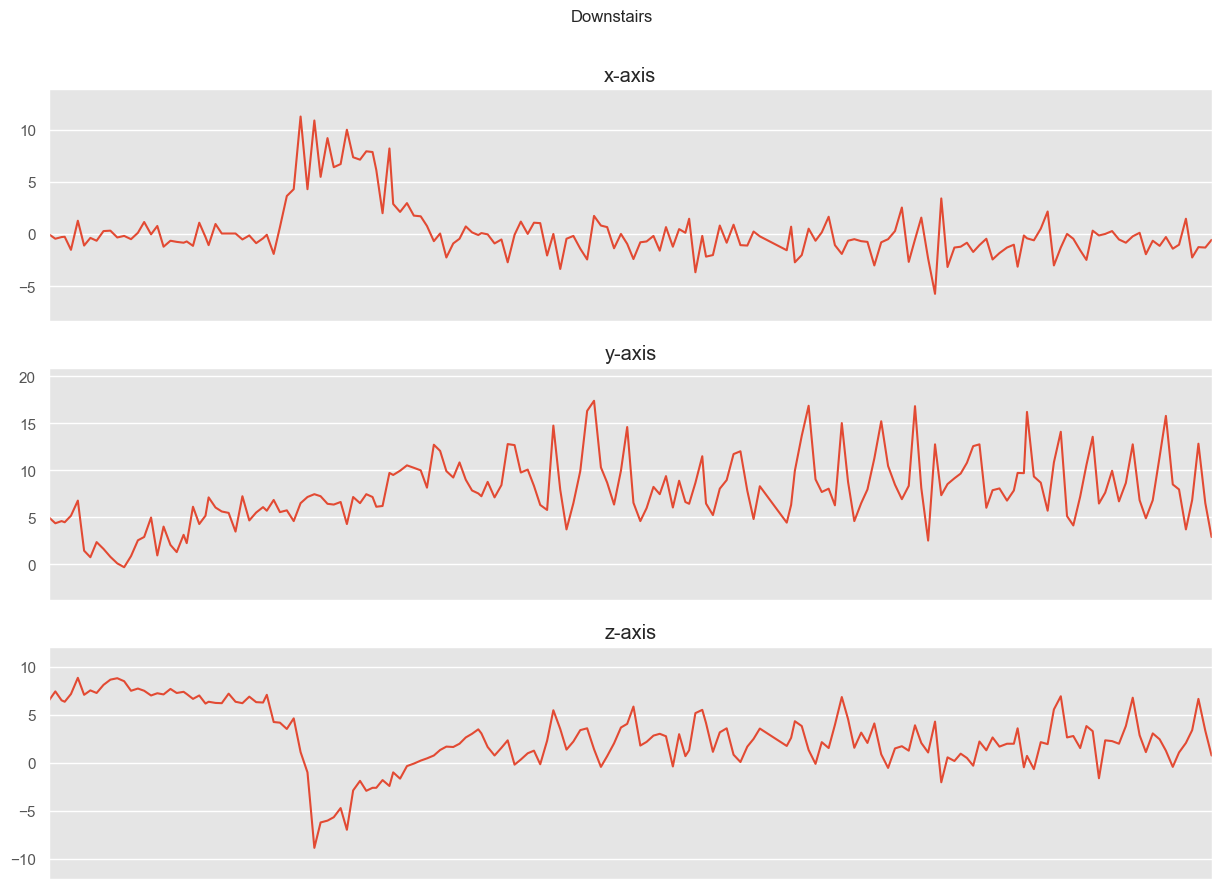

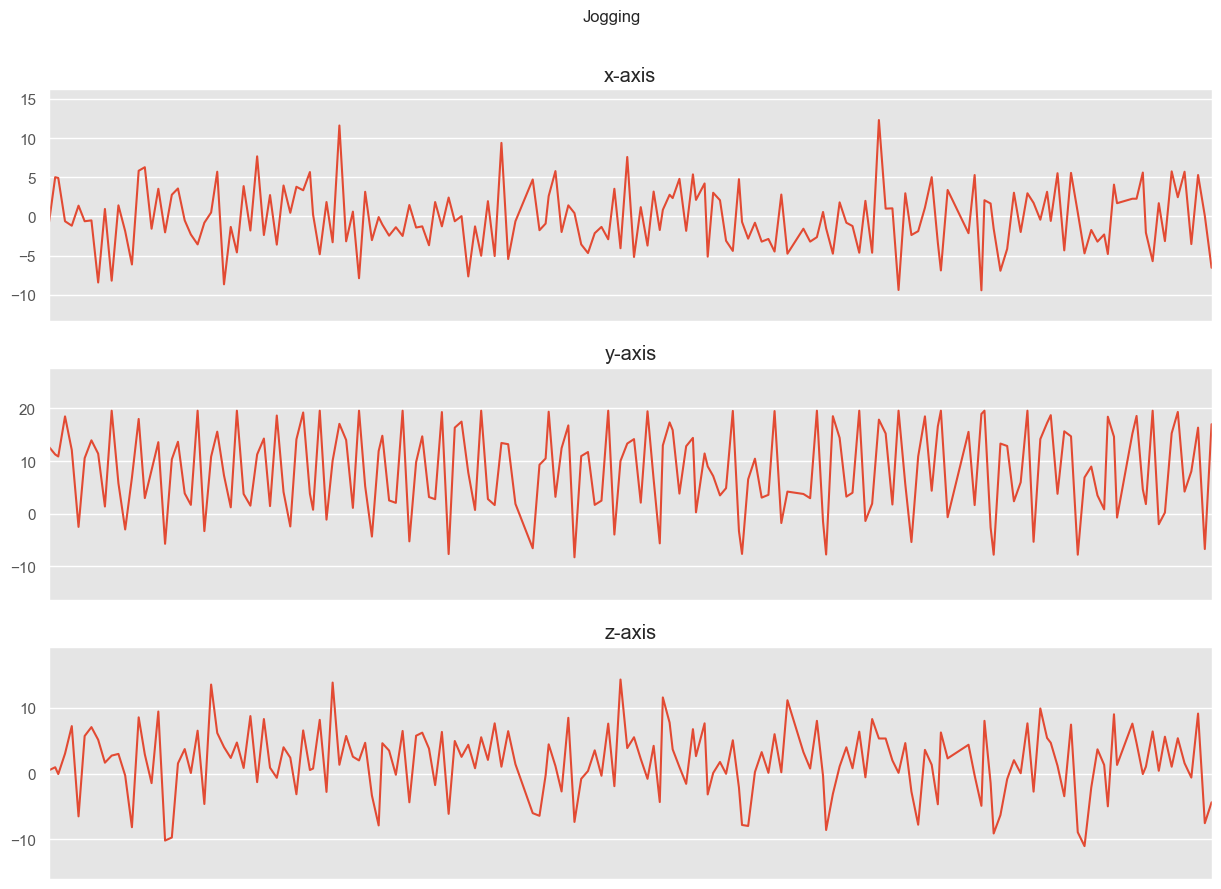

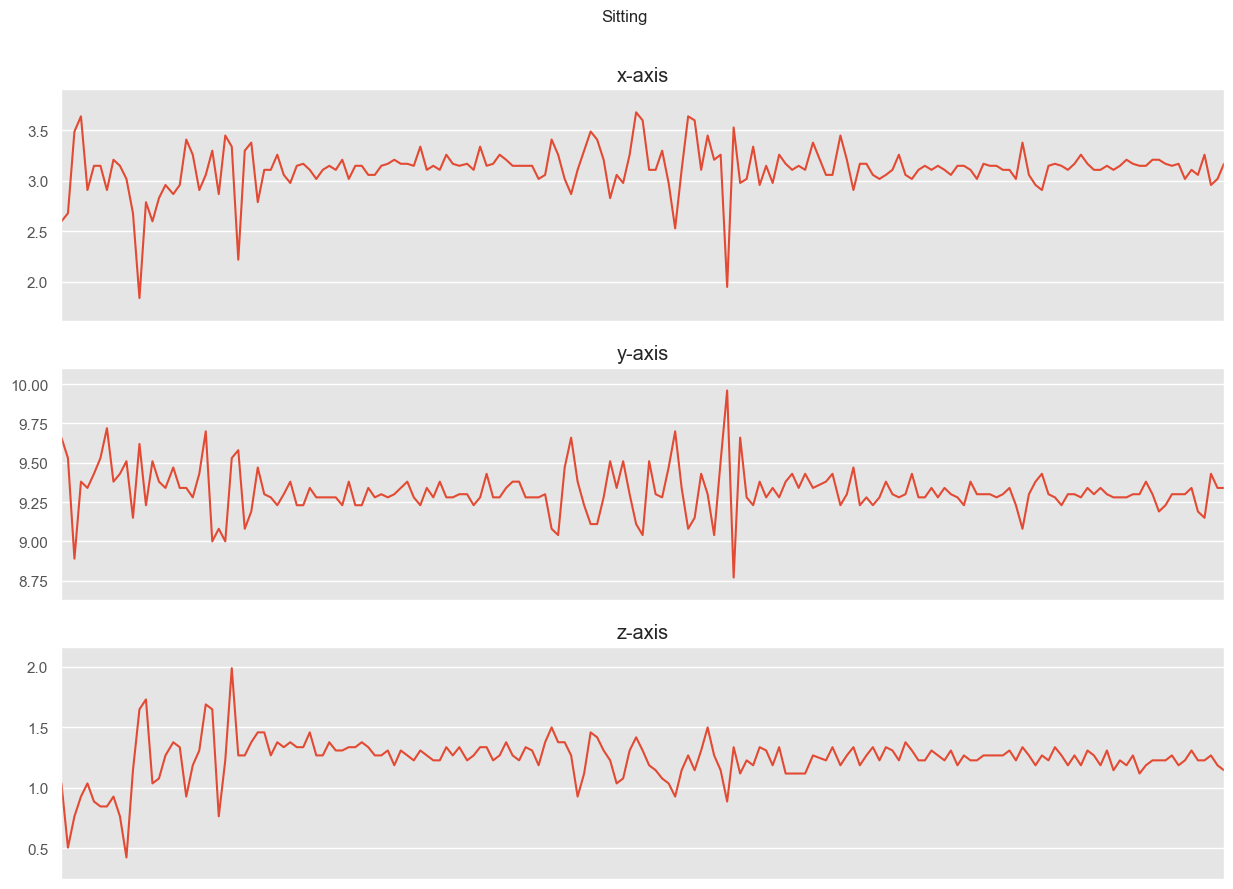

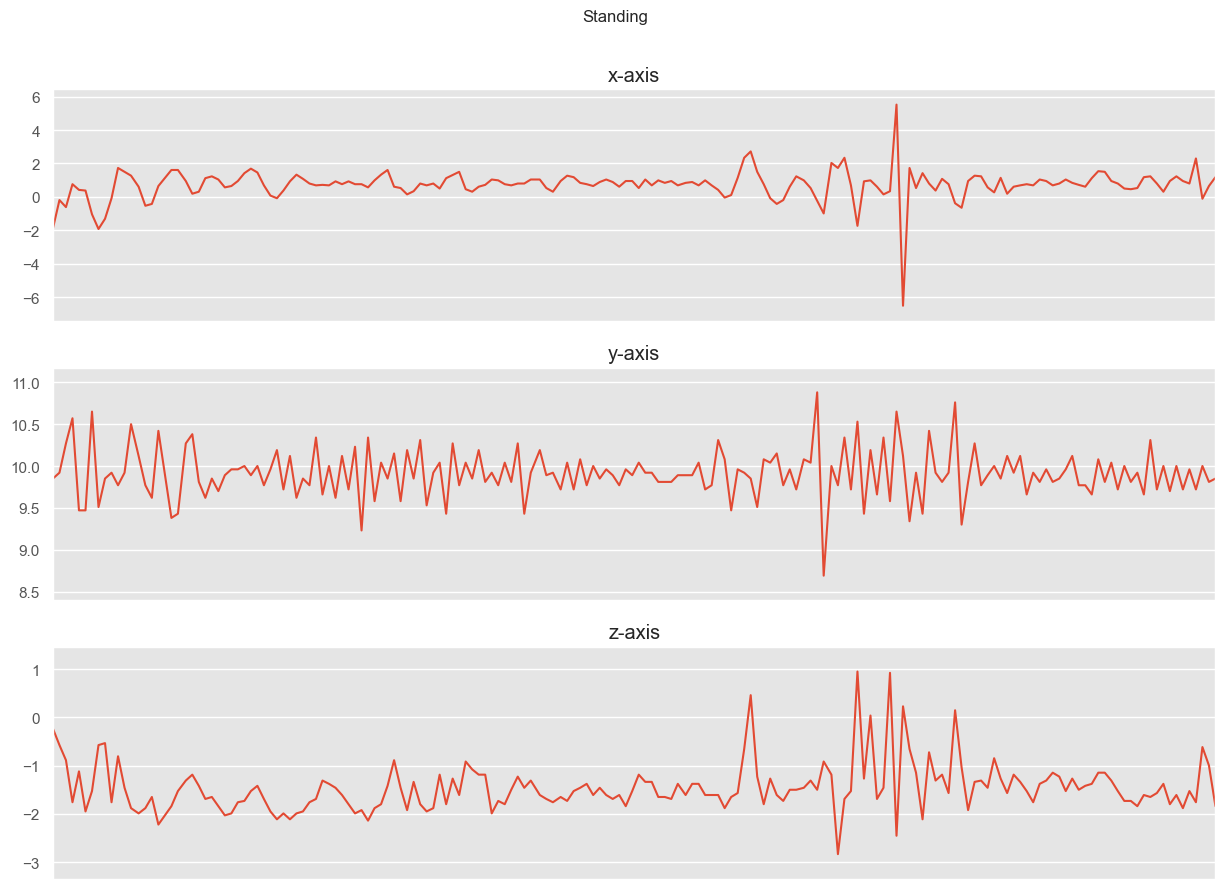

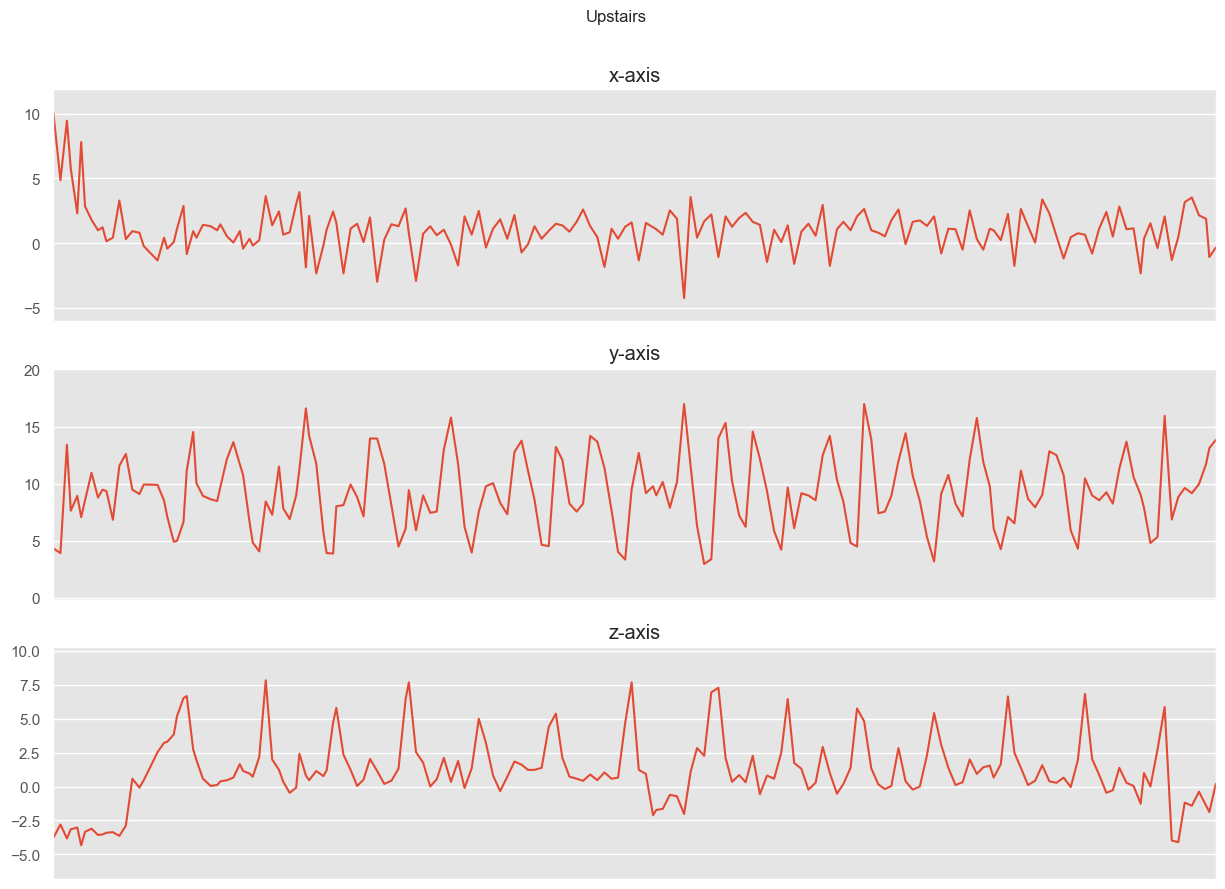

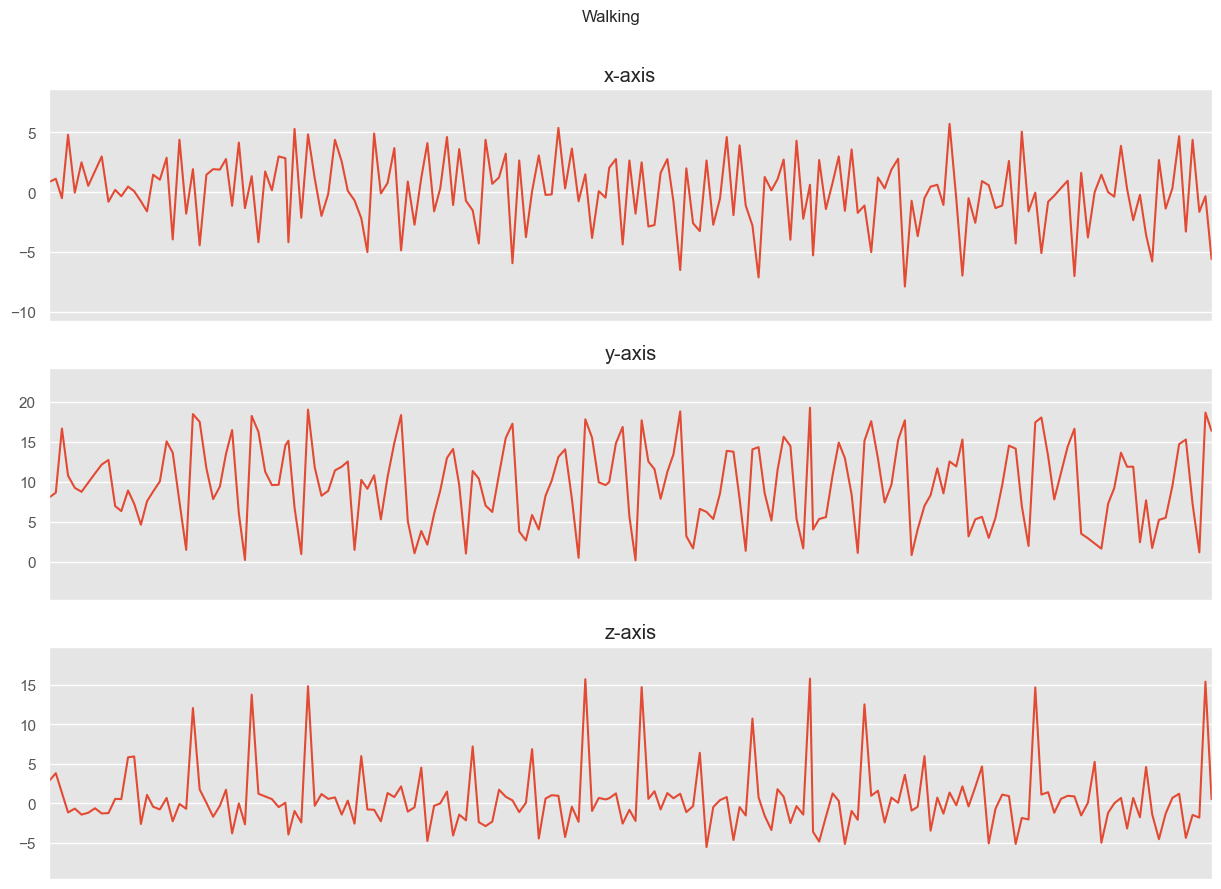

In [30]:
#Plotting first 180 values of each activity for comparison purposes
for activity in np.unique(df["activity"]):
    subset = df[df["activity"] == activity][:180]
    plot_activity(activity, subset)

In [31]:
# Define column name of the label vector
Label = "ActivityEncoded"

In [32]:
# Transform the labels from String to Integer via LabelEncoder
le = preprocessing.LabelEncoder() #Should be used on y data, not X

In [33]:
data

activity        timestamp  x-axis  y-axis  z-axis
0        Jogging   49105962326000    -0.7    12.7     0.5
1        Jogging   49106062271000     5.0    11.3     1.0
2        Jogging   49106112167000     4.9    10.9    -0.1
3        Jogging   49106222305000    -0.6    18.5     3.0
4        Jogging   49106332290000    -1.2    12.1     7.2
...          ...              ...     ...     ...     ...
1086461  Sitting  131623331483000     9.0    -1.6     1.7
1086462  Sitting  131623371431000     9.0    -1.5     1.7
1086463  Sitting  131623411592000     9.1    -1.4     1.7
1086464  Sitting  131623491487000     9.0    -1.5     1.7
1086465  Sitting  131623531465000     8.9    -1.3     1.6

[1086466 rows x 5 columns]

In [34]:
# Add a new column to the existing DataFrame with the encoded values
data['Label'] = le.fit_transform(df["activity"].values.ravel())

In [722]:
data

activity  x-axis  y-axis  z-axis  Label
0        Jogging    -0.2     0.8     0.0      1
1        Jogging     0.6     0.6     0.1      1
2        Jogging     0.6     0.5    -0.1      1
3        Jogging    -0.2     1.7     0.6      1
4        Jogging    -0.3     0.7     1.4      1
...          ...     ...     ...     ...    ...
1086461  Sitting     1.2    -1.3     0.3      2
1086462  Sitting     1.2    -1.3     0.3      2
1086463  Sitting     1.2    -1.3     0.3      2
1086464  Sitting     1.2    -1.3     0.3      2
1086465  Sitting     1.2    -1.3     0.3      2

[1086466 rows x 5 columns]

In [35]:
#Normalize Data

def normalize(x):
    scaler=preprocessing.StandardScaler().fit(x)
    scaled=scaler.transform(x)
    return scaled

In [36]:
features=data[['x-axis', 'y-axis', 'z-axis']]

In [37]:
features=normalize(features)
features=pd.DataFrame(features)

In [38]:
data[['x-axis', 'y-axis', 'z-axis']]=features

In [39]:
data=data.drop(columns='timestamp')

In [65]:
data.isna().any() 

activity    False
x-axis      False
y-axis      False
z-axis       True
Label       False
dtype: bool

In [93]:
sample_rate=20
time_step=4*20 #4 seconds
segments=[]
labels=[]
for i in range(0, len(data)-time_step, time_step):
    slcx=data['x-axis'][i: i+time_step]
    slcy=data['y-axis'][i: i+time_step]
    slcz=data['z-axis'][i: i+time_step]
    label=stats.mode(data['Label'][i: i+time_step])[0][0]
    segments.append([slcx, slcy, slcz])
    labels.append(label)
reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, 
                            time_step, n_features)
labels=np.asarray(labels)

/var/folders/wv/c3g7vgxd10n0mdl2_flcjj480000gn/T/ipykernel_21867/1696538264.py:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label=stats.mode(data['Label'][i: i+time_step])[0][0]


In [94]:
segments

[[0    -0.2
  1     0.6
  2     0.6
  3    -0.2
  4    -0.3
       ... 
  75   -0.2
  76    0.3
  77    0.7
  78   -0.4
  79    0.1
  Name: x-axis, Length: 80, dtype: float64,
  0     0.8
  1     0.6
  2     0.5
  3     1.7
  4     0.7
       ... 
  75    0.5
  76    1.8
  77   -0.6
  78    0.8
  79    1.4
  Name: y-axis, Length: 80, dtype: float64,
  0     0.0
  1     0.1
  2    -0.1
  3     0.6
  4     1.4
       ... 
  75   -0.1
  76    0.8
  77    0.2
  78   -0.7
  79    1.7
  Name: z-axis, Length: 80, dtype: float64],
 [80    -0.0
  81    -0.6
  82    -0.8
  83    -0.4
  84    -0.3
        ... 
  155    0.7
  156   -0.7
  157    0.7
  158   -0.0
  159   -0.8
  Name: x-axis, Length: 80, dtype: float64,
  80    -2.3
  81     0.5
  82     0.7
  83    -0.8
  84    -0.7
        ... 
  155   -0.5
  156    1.2
  157    1.1
  158   -2.2
  159   -0.1
  Name: y-axis, Length: 80, dtype: float64,
  80    -1.6
  81    -0.3
  82    -0.0
  83     0.7
  84    -0.2
        ... 
  155    0.2
  156 

In [95]:
reshaped_segments

array([[[-0.19760041,  0.6323443 ,  0.6164981 ],
        [-0.18571576, -0.26890832,  0.1034774 ],
        [-0.18571576, -0.16986957, -1.3226806 ],
        ...,
        [ 1.2696048 ,  0.21398771, -1.3479824 ],
        [-1.4338049 , -0.14074545,  0.84907436],
        [ 0.15677267, -0.65568066,  1.6958567 ]],

       [[-0.03517687, -0.6155439 , -0.7759867 ],
        [-0.40756255, -0.29069683, -0.52046674],
        [ 0.41643983, -0.68685186,  1.0067108 ],
        ...,
        [-0.66140217,  1.9933747 ,  1.0521878 ],
        [ 0.89770716,  0.16535494, -0.80730045],
        [ 1.4784397 , -1.9573224 , -2.4007387 ]],

       [[-0.34813932, -0.56404376, -0.43133187],
        [-0.7938137 ,  0.49369004,  0.1490352 ],
        [ 0.23222776,  0.23222776,  0.7175177 ],
        ...,
        [-2.5065866 , -1.9344363 ,  0.8176062 ],
        [ 0.382772  ,  1.67011   ,  1.1322888 ],
        [-2.1604357 ,  0.29408872, -0.363884  ]],

       ...,

       [[ 1.2006336 ,  1.2064507 ,  1.2064507 ],
        [ 1

In [96]:
features=reshaped_segments

In [83]:
labels=np.asarray(labels)

In [97]:
labels.shape

(13580,)

In [98]:
features.shape

(13580, 80, 3)

In [219]:
X_train, X_test, y_train, y_test=train_test_split(features, labels,
                                                 train_size=.33)

In [ ]:
#Deal with Na values in Z column...assign mean of acitivity as to 
#not drop rows...depending on how many there are

In [77]:
encoded=np.asarray(encoded)
activity=np.asarray(activity)

In [78]:
activity.shape

(13580,)

In [79]:
encoded.shape

(13580,)

In [102]:
X_train.shape

(4481, 80, 3)

In [103]:
y_train.shape

(4481,)

In [104]:
# Set input & output dimensions
num_time_periods, num_sensors = X_train.shape[1], X_train.shape[2]
num_classes = le.classes_.size
print(list(le.classes_))

['Downstairs', 'Jogging', 'Sitting', 'Standing', 'Upstairs', 'Walking']


In [108]:
input_shape=(num_time_periods*num_sensors)

In [199]:
X_train=X_train.reshape(4481,input_shape) #Reshape train data
#for Keras into shape where it can be read

In [200]:
X_train.shape

(4481, 240)

In [193]:
#Convert data type to float32 for Keras to process

X_train=X_train.astype("float32")
y_train=y_train.astype('float32')

In [118]:
num_classes

6

In [194]:
y_train

array([1., 0., 3., ..., 5., 1., 0.], dtype=float32)

In [195]:
# One-hot encoding of y_train labels (only execute once!)
y_train = np_utils.to_categorical(y_train, num_classes)

In [196]:
y_train[400]

array([0., 0., 0., 0., 0., 1.], dtype=float32)

In [197]:
y_train.shape

(4481, 6)

In [126]:
num_sensors

3

In [127]:
input_shape

240

In [130]:
#1D Convulutional Neural Network--Read The Docs

model_m=Sequential()
model_m.add(Reshape((time_step, num_sensors), 
                    input_shape=(input_shape,)))
model_m.add(Conv1D(100, 10, activation='relu', 
                 input_shape=(time_step,
                              num_sensors)))
model_m.add(Conv1D(100,10,activation='relu'))
model_m.add(MaxPooling1D(3))
model_m.add(Conv1D(160,10,activation='relu'))
model_m.add(GlobalAveragePooling1D())
model_m.add(Dropout(0.5))
model_m.add(Dense(num_classes, activation='softmax'))
print(model_m.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_1 (Reshape)         (None, 80, 3)             0         
                                                                 
 conv1d_3 (Conv1D)           (None, 71, 100)           3100      
                                                                 
 conv1d_4 (Conv1D)           (None, 62, 100)           100100    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 20, 100)          0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 11, 160)           160160    
                                                                 
 global_average_pooling1d_1   (None, 160)              0         
 (GlobalAveragePooling1D)                             

In [148]:
#Fit the Model

callbacks_list=[
    keras.callbacks.EarlyStopping(monitor='accuracy', patience=1)
]

In [149]:
model_m.compile(loss='categorical_crossentropy',
               optimizer='adam', metrics=['accuracy'])

In [150]:
#Hyperparamters

batch_size=400
epochs=50

In [151]:
#enable validation to use ModelCheckpoint and EarlyStopping callbacks

history=model_m.fit(X_train,
                   y_train,
                   batch_size=batch_size,
                   epochs=epochs,
                   callbacks=callbacks_list,
                   validation_split=0.2,
                   verbose=1)

Epoch 1/50


2022-12-01 17:28:01.915723: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


9/9 [==============================] - 2s 140ms/step - loss: 0.5681 - accuracy: 0.8633 - val_loss: 0.5284 - val_accuracy: 0.8740
Epoch 2/50


2022-12-01 17:28:03.222263: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


9/9 [==============================] - 1s 116ms/step - loss: 0.1963 - accuracy: 0.9381 - val_loss: 0.3863 - val_accuracy: 0.8841
Epoch 3/50
9/9 [==============================] - 1s 108ms/step - loss: 0.1585 - accuracy: 0.9545 - val_loss: 0.3015 - val_accuracy: 0.9052
Epoch 4/50
9/9 [==============================] - 1s 112ms/step - loss: 0.1345 - accuracy: 0.9590 - val_loss: 0.2985 - val_accuracy: 0.8986
Epoch 5/50
9/9 [==============================] - 1s 112ms/step - loss: 0.1185 - accuracy: 0.9671 - val_loss: 0.2910 - val_accuracy: 0.9030
Epoch 6/50
9/9 [==============================] - 1s 107ms/step - loss: 0.1117 - accuracy: 0.9671 - val_loss: 0.2837 - val_accuracy: 0.9041


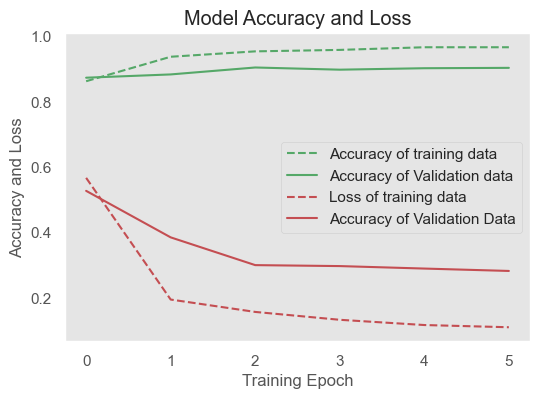

In [171]:
#Summarize Learning of Model with Graph

plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'],"g--", #green -- is type
         label="Accuracy of training data")
plt.plot(history.history['val_accuracy'],'g',
         label='Accuracy of Validation data')
plt.plot(history.history['loss'], 'r--', 
        label='Loss of training data')
plt.plot(history.history['val_loss'], 'r',
        label='Accuracy of Validation Data')
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Training Epoch')
plt.legend()
plt.grid(False)

In [160]:
history.history['accuracy']

[0.8740245699882507,
 0.8840579986572266,
 0.9052397012710571,
 0.8985507488250732,
 0.9030100703239441,
 0.9041248559951782]

In [185]:
#My data is already split, so I need to one-hot encode and change
    #data to float type

X_test=X_test.astype("float32")
y_test=y_test.astype('float32')

In [186]:
X_test.shape 

(9099, 80, 3)

In [188]:
y_test=np_utils.to_categorical(y_test, num_classes)

In [190]:
y_test.shape

(9099, 6)

In [192]:
X_test=X_test.reshape(9099,240)

In [203]:
score

[0.18164952099323273, 0.9427409768104553]

In [206]:
#Confusion Matrix for Data

y_predictions=model_m.predict(X_test)

  9/285 [..............................] - ETA: 1s  

2022-12-01 18:24:29.603129: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


285/285 [==============================] - 3s 8ms/step


In [222]:
y_predictions

array([[9.9164432e-01, 2.0109871e-03, 1.0605124e-06, 3.5602508e-07,
        1.8725041e-03, 4.4707265e-03],
       [7.6630636e-04, 8.7011736e-05, 1.6086690e-09, 4.2216488e-08,
        9.7905716e-04, 9.9816769e-01],
       [4.5443270e-02, 2.8281189e-03, 1.5404114e-05, 7.7520666e-04,
        2.5881717e-01, 6.9212079e-01],
       ...,
       [2.8127965e-03, 7.9192459e-06, 4.2008272e-12, 6.8512340e-13,
        6.0214174e-06, 9.9717325e-01],
       [7.1492832e-07, 1.2912669e-06, 9.9976414e-01, 2.1181685e-04,
        2.0419191e-05, 1.6509284e-06],
       [1.4108089e-06, 9.9855822e-01, 7.1988431e-12, 2.3099033e-13,
        1.4402773e-03, 1.1827782e-07]], dtype=float32)

In [209]:
from sklearn.metrics import ConfusionMatrixDisplay

<function numpy.argmax(a, axis=None, out=None, *, keepdims=<no value>)>

In [210]:
max_y_pred=np.argmax(y_predictions, axis=1)

In [211]:
max_y_pred

array([0, 5, 5, ..., 5, 2, 1])

In [214]:
max_y_test=np.argmax(y_test, axis=1)

In [215]:
max_y_test

array([0, 5, 5, ..., 5, 2, 1])

In [220]:
y_test

array([0, 5, 0, ..., 4, 1, 4])

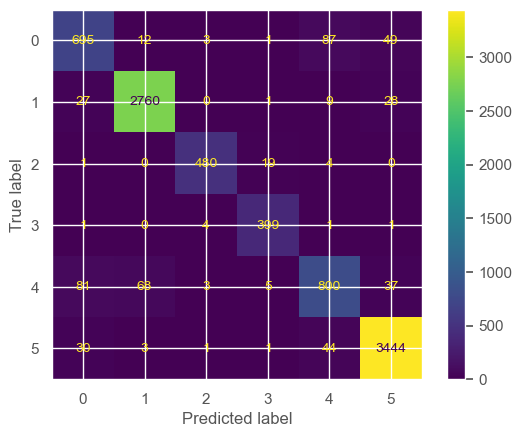

In [216]:
ConfusionMatrixDisplay.from_predictions(max_y_test, max_y_pred)

In [218]:
print(classification_report(max_y_test, max_y_pred))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       847
           1       0.97      0.98      0.97      2825
           2       0.98      0.95      0.96       504
           3       0.94      0.98      0.96       406
           4       0.85      0.80      0.83       994
           5       0.97      0.98      0.97      3523

    accuracy                           0.94      9099
   macro avg       0.92      0.92      0.92      9099
weighted avg       0.94      0.94      0.94      9099



In [334]:
#Lets run it back, uploading data, splicing it appropriately 
 #and developing a CNN to classify....using uploaded WISDM Data
    
activity_key=pd.read_csv('Activity_key', header=None)

In [404]:
keys=activity_key[1].to_numpy()
values=activity_key[0].to_numpy()

In [405]:
keys=keys.astype(str)
values=values.astype(str)

In [406]:
x=dict(zip(keys, values)) #Using zip

In [407]:
x

{'A': 'walking',
 'B': 'jogging',
 'C': 'stairs',
 'D': 'sitting',
 'E': 'standing',
 'F': 'typing',
 'G': 'teeth',
 'H': 'soup',
 'I': 'chips',
 'J': 'pasta',
 'K': 'drinking',
 'L': 'sandwich',
 'M': 'kicking',
 'O': 'catch',
 'P': 'dribbling',
 'Q': 'writing',
 'R': 'clapping',
 'S': 'folding'}

In [292]:
df=pd.read_csv('WISDM Phone Accel/data_1600_accel_phone.txt', header=None)
df

0  1                2    3    4             5
0      1600  A  252207666810782 -0.4  8.8    1.0550842;
1      1600  A  252207717164786 -0.9  9.8    1.0169983;
2      1600  A  252207767518790  2.0 11.1     2.619156;
3      1600  A  252207817872794  0.5 12.7   0.18455505;
4      1600  A  252207868226798 -2.2 13.9   -4.4224854;
...     ... ..              ...  ...  ...           ...
64306  1600  S  244505660942200 -2.4  9.2   -1.5882874;
64307  1600  S  244505711296204 -2.0 10.0   -1.2299347;
64308  1600  S  244505761650208 -1.4  9.9  -0.47924805;
64309  1600  S  244505812004212 -1.2  9.3  -0.15570068;
64310  1600  S  244505862358216 -2.2  9.8  -0.62454224;

[64311 rows x 6 columns]

In [306]:
import os
names=['subject ID', 'activity', 'timestamp', 'x', 'y', 'z']

def upload(file_path):
    l=[]
    for i in os.listdir:
        df=pd.read_csv(i, header=None, names=names)
        df['z']=df['z'].replace(regex=True, inplace=True, to_replace=';', value='')
        l.append(df)
    v=pd.concat(l)
    return v

In [310]:
l=[]
for file in os.listdir('WISDM Phone Accel'):
    filename = os.fsdecode(file)
    l.append(filename)  

In [339]:
x=[]
for i in l:
    df=pd.read_csv(f"WISDM Phone Accel/{i}", header=None, names=names)
    df['z'].replace(regex=True, inplace=True, to_replace=f';', value=f'')
    x.append(df)
v=pd.concat(x)    

In [340]:
v=v.reset_index()

In [341]:
v #Next Steps: figure out sample rate, splice data into specific second segements, reshape features and labels, 
    #develop label econder for activity (try and change labels to actual activity), normalize features, split/train,
    #one hot encode,
    #develop CNN1D (read docs to understand best parameters), fit model, graph learning rate, print accuracy

index  subject ID activity        timestamp   x    y            z
0            0        1615        A  168766070661077 1.0  4.4     9.299789
1            1        1615        A  168766121015081 1.0  2.9     4.681534
2            2        1615        A  168766171369085 2.5  1.2    5.3340454
3            3        1615        A  168766221723089 2.4 -0.5    3.2437592
4            4        1615        A  168766272077093 2.9 -1.5  -0.55303955
...        ...         ...      ...              ...  ..  ...          ...
1928405  80865        1610        S   17989031516129 5.9  7.6   -1.0972595
1928406  80866        1610        S   17989081870133 5.8  7.8   -1.6237335
1928407  80867        1610        S   17989132224137 5.5  7.6   -1.6626434
1928408  80868        1610        S   17989182578141 5.8  7.6    -1.000412
1928409  80869        1610        S   17989232932145 6.0  7.7   -1.0237274

[1928410 rows x 7 columns]

In [336]:
sample_rate=20

In [394]:
v['activity'][v['activity']=='Walking']='A'

/var/folders/wv/c3g7vgxd10n0mdl2_flcjj480000gn/T/ipykernel_21867/3677059764.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v['activity'][v['activity']=='Walking']='A'


In [395]:
df=v

In [396]:
#Want to iterate through dictionary to replace the values 

index  subject ID activity        timestamp   x    y            z
0            0        1615        A  168766070661077 1.0  4.4     9.299789
1            1        1615        A  168766121015081 1.0  2.9     4.681534
2            2        1615        A  168766171369085 2.5  1.2    5.3340454
3            3        1615        A  168766221723089 2.4 -0.5    3.2437592
4            4        1615        A  168766272077093 2.9 -1.5  -0.55303955
...        ...         ...      ...              ...  ..  ...          ...
1928405  80865        1610        S   17989031516129 5.9  7.6   -1.0972595
1928406  80866        1610        S   17989081870133 5.8  7.8   -1.6237335
1928407  80867        1610        S   17989132224137 5.5  7.6   -1.6626434
1928408  80868        1610        S   17989182578141 5.8  7.6    -1.000412
1928409  80869        1610        S   17989232932145 6.0  7.7   -1.0237274

[1928410 rows x 7 columns]

In [400]:
first_key=list(x)[0]

In [402]:
keys=list(x)

In [408]:
keys

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'O', 'P', 'Q', 'R', 'S'], dtype='<U1')

In [410]:
values=list(x.values())

In [411]:
values

['walking',
 'jogging',
 'stairs',
 'sitting',
 'standing',
 'typing',
 'teeth',
 'soup',
 'chips',
 'pasta',
 'drinking',
 'sandwich',
 'kicking',
 'catch',
 'dribbling',
 'writing',
 'clapping',
 'folding']

In [439]:
df['activity'].replace(regex=True, inplace=True, to_replace=x.keys(), value=x.values())

In [452]:
df['z']=df['z'].astype(dtype='float32')

In [455]:
df #Step 2: Splice data into 10 second segments, convert to array, and reshape

index  subject ID activity        timestamp   x    y    z
0            0        1615  walking  168766070661077 1.0  4.4  9.3
1            1        1615  walking  168766121015081 1.0  2.9  4.7
2            2        1615  walking  168766171369085 2.5  1.2  5.3
3            3        1615  walking  168766221723089 2.4 -0.5  3.2
4            4        1615  walking  168766272077093 2.9 -1.5 -0.6
...        ...         ...      ...              ...  ..  ...  ...
1928405  80865        1610  folding   17989031516129 5.9  7.6 -1.1
1928406  80866        1610  folding   17989081870133 5.8  7.8 -1.6
1928407  80867        1610  folding   17989132224137 5.5  7.6 -1.7
1928408  80868        1610  folding   17989182578141 5.8  7.6 -1.0
1928409  80869        1610  folding   17989232932145 6.0  7.7 -1.0

[1928410 rows x 7 columns]

In [630]:
df['activity'] #How do i eliminate data that is after E in dictionary?

0          A
1          A
2          A
3          A
4          A
          ..
1928405    S
1928406    S
1928407    S
1928408    S
1928409    S
Name: activity, Length: 1928410, dtype: object

In [635]:
df=df.sort_values('activity')

In [637]:
df=df.drop(columns='index')

In [640]:
df=df.reset_index()

In [655]:
activities_5=df[:520064]

In [629]:
df['activity'].replace(regex=True, inplace=True, to_replace=x.values(), value=x.keys())

In [659]:
time_step=200
features=[]
labels=[]
for i in range(0, len(df)-200, 200):
    slcx=df['x'][i:i+time_step]
    slcy=df['y'][i:i+time_step]
    slcz=df['z'][i:i+time_step]
    l=stats.mode(df['activity'][i:i+time_step])[0][0]
    features.append([slcx,slcy,slcz])
    labels.append(l)

/var/folders/wv/c3g7vgxd10n0mdl2_flcjj480000gn/T/ipykernel_21867/366211386.py:8: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  l=stats.mode(df['activity'][i:i+time_step])[0][0]
/var/folders/wv/c3g7vgxd10n0mdl2_flcjj480000gn/T/ipykernel_21867/366211386.py:8: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  l=stats.mode(df['activity'][i:i+time_step])[0][0]


In [469]:
labels

['walking',
 'walking',
 'walking',
 'walking',
 'walking',
 'walking',
 'walking',
 'walking',
 'walking',
 'walking',
 'walking',
 'walking',
 'walking',
 'walking',
 'walking',
 'walking',
 'walking',
 'walking',
 'jogging',
 'jogging',
 'jogging',
 'jogging',
 'jogging',
 'jogging',
 'jogging',
 'jogging',
 'jogging',
 'jogging',
 'jogging',
 'jogging',
 'jogging',
 'jogging',
 'jogging',
 'jogging',
 'jogging',
 'jogging',
 'stairs',
 'stairs',
 'stairs',
 'stairs',
 'stairs',
 'stairs',
 'stairs',
 'stairs',
 'stairs',
 'stairs',
 'stairs',
 'stairs',
 'stairs',
 'stairs',
 'stairs',
 'stairs',
 'stairs',
 'stairs',
 'sitting',
 'sitting',
 'sitting',
 'sitting',
 'sitting',
 'sitting',
 'sitting',
 'sitting',
 'sitting',
 'sitting',
 'sitting',
 'sitting',
 'sitting',
 'sitting',
 'sitting',
 'sitting',
 'sitting',
 'standing',
 'standing',
 'standing',
 'standing',
 'standing',
 'standing',
 'standing',
 'standing',
 'standing',
 'standing',
 'standing',
 'standing',
 'standing

In [497]:
features=np.asarray(features).reshape(-1,time_step, 3)

In [498]:
features.shape

(9642, 200, 3)

In [499]:
labels=np.asarray(labels)

In [500]:
labels.shape

(9642,)

In [478]:
labels #Each value corresponds to the mode activity observed during the 10 second segment

array(['walking', 'walking', 'walking', ..., 'folding', 'folding',
       'folding'], dtype='<U9')

In [522]:
values[17]

'folding'

In [671]:
le.fit(keys)

TypeError: LabelEncoder.fit() missing 1 required positional argument: 'y'

In [649]:
values[:5]

['walking', 'jogging', 'stairs', 'sitting', 'standing']

In [672]:
le.classes_

AttributeError: type object 'LabelEncoder' has no attribute 'classes_'

In [485]:
le_labels=le.transform(labels)

In [650]:
le_labels 

array([16, 16, 16, ...,  5,  5,  5])

In [488]:
features

array([[[  0.9868622 ,   1.0150146 ,   2.478012  ],
        [  2.3718872 ,   2.8739624 ,   4.1819916 ],
        [  9.530151  ,  18.182312  ,  19.250153  ],
        ...,
        [ -5.38754272,   2.88142395,  -6.18190002],
        [  0.13691711,   3.34512329,   2.43014526],
        [  2.77101135,   1.06791687, -17.69917297]],

       [[ -3.7256165 ,   1.1641693 ,   3.538391  ],
        [-10.914261  ,   7.1594696 ,   1.4927826 ],
        [  5.4814453 ,   0.18127441,   3.689209  ],
        ...,
        [ -1.35401917,   0.78805542,  -0.71806335],
        [ -5.77703857,   0.38534546,  -2.31248474],
        [ -2.7467041 ,  -3.69978333,   3.45196533]],

       [[  9.4249115 ,   1.8335876 ,   1.7042847 ],
        [ -2.034439  ,  -0.77090454,   4.951355  ],
        [  2.7111359 ,  -2.8691711 ,  -1.8404236 ],
        ...,
        [  0.69178772,  -4.35723877,  -3.47370911],
        [  1.15733337,   1.07720947,  -2.73739624],
        [  3.45098877,   0.32226562,   1.47802734]],

       ...,

      

In [501]:
#Step 3: Normalize Data

features=features.reshape(9642, 600)
scaler=preprocessing.StandardScaler().fit(features)

In [502]:
new_features=scaler.transform(features)

In [503]:
new_features.shape

array([[ 0.1316117 ,  0.13601608,  0.42041346, ...,  0.24044346,
        -0.108409  , -3.95658844],
       [-0.77786949,  0.16497294,  0.62523578, ..., -0.88714674,
        -1.09459652,  0.3832238 ],
       [ 1.76010651,  0.29493366,  0.27096065, ...,  0.3794024 ,
        -0.2626452 , -0.02179082],
       ...,
       [ 0.94189532,  0.96051471,  0.927976  , ..., -0.66167485,
        -0.6622005 , -0.71797427],
       [ 0.91513245,  0.94790108,  0.99659987, ..., -0.53295939,
        -0.54563408, -0.51769923],
       [ 1.07249982,  1.08058714,  1.0752802 , ..., -0.5233458 ,
        -0.54804545, -0.5415936 ]])

In [504]:
new_features.shape

(9642, 600)

In [505]:
labels.shape

(9642,)

In [572]:
X_train, X_test, y_train, y_test=train_test_split(new_features, le_labels, train_size=.50)
X_test.astype('float32')
X_train.astype('float32')

array([[-0.47259665, -0.4663457 , -0.4636003 , ..., -0.21867016,
        -0.22184758, -0.21311173],
       [-0.78557616, -0.7902951 , -0.78107154, ...,  1.3893532 ,
         1.4017088 ,  1.3974228 ],
       [-0.3393948 , -0.3452542 , -0.34374213, ...,  1.4974507 ,
         1.5188528 ,  1.5137012 ],
       ...,
       [-1.9395895 , -1.9540317 , -1.9510696 , ..., -0.8068609 ,
        -0.8484221 , -0.8642584 ],
       [ 1.663901  ,  1.6740146 ,  1.6626136 , ..., -0.4485918 ,
        -0.46597677, -0.45128527],
       [-0.14542879, -0.4779018 , -0.22026455, ...,  1.3516129 ,
         1.4361497 ,  1.0296085 ]], dtype=float32)

In [526]:
X_train

array([[ 0.59828338,  0.60139938,  0.59135861, ...,  0.93621728,
         0.95143895,  0.94447543],
       [ 1.25908388,  1.1881377 ,  1.05710671, ...,  0.55180114,
         2.1876028 ,  1.68831261],
       [ 1.1762442 ,  1.42950913,  1.66181197, ..., -1.47305497,
        -0.86814861, -0.62160155],
       ...,
       [ 0.30977268,  0.40050843,  0.43285732, ..., -0.84337887,
        -0.63756601, -0.70175665],
       [ 0.72961817,  0.73000331,  0.71755955, ...,  0.41232808,
         0.37540855,  0.40642626],
       [-1.6457546 , -1.66129652, -1.64762502, ...,  0.2544039 ,
         0.25989947,  0.2476439 ]])

In [573]:
#One hot encode of y_test

y_train=np_utils.to_categorical(y_train, 18)

In [574]:
y_test=np_utils.to_categorical(y_test, 18)

In [575]:
y_test.astype('float32')
y_train.astype('float32')

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [530]:
time_step

200

In [617]:
#Develop layers of model

model_j=Sequential() #Creates a stack of layers
model_j.add(Reshape((time_step, 3), input_shape=(600,))) #Must define input shape in first layer
#Batch size=9642 in this example...it is equal to number of windows..
#entering batch size explicity limits model training to that specific number of batches
model_j.add(Conv1D(200, 10, activation='relu',input_shape=(time_step,3)))
model_j.add(Conv1D(200,10,activation='relu'))
model_j.add(MaxPooling1D(3)) #Downsample features by summarizing the presence of features in patches of feature map
#Max=most activated presence of a feature. Done so model does not become sensitive to location of features from inputs
model_j.add(Conv1D(160,10,activation='relu'))
model_j.add(Conv1D(160,10, activation='relu'))
model_j.add(GlobalAveragePooling1D())
model_j.add(Dropout(0.5))
model_j.add(Dense(18, activation='softmax'))
print(model_j.summary())

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_19 (Reshape)        (None, 200, 3)            0         
                                                                 
 conv1d_66 (Conv1D)          (None, 191, 200)          6200      
                                                                 
 conv1d_67 (Conv1D)          (None, 182, 200)          400200    
                                                                 
 max_pooling1d_19 (MaxPoolin  (None, 60, 200)          0         
 g1D)                                                            
                                                                 
 conv1d_68 (Conv1D)          (None, 51, 160)           320160    
                                                                 
 conv1d_69 (Conv1D)          (None, 42, 160)           256160    
                                                     

In [618]:
#Model compile and hyperparameters

model_j.compile(optimizer='adam', loss='categorical_crossentropy',
               metrics=['accuracy'])

In [619]:
#Callbacks list??
callbacks_list=[
    keras.callbacks.EarlyStopping(monitor='accuracy', patience=2)
]

In [624]:
#set fit model=history
history=model_j.fit(X_train, y_train, batch_size=200,epochs=50, verbose=1, callbacks=callbacks_list,
           validation_split=0.1)

Epoch 1/50
22/22 [==============================] - 8s 359ms/step - loss: 1.1224 - accuracy: 0.6065 - val_loss: 1.1626 - val_accuracy: 0.6149
Epoch 2/50
22/22 [==============================] - 7s 322ms/step - loss: 1.1068 - accuracy: 0.6049 - val_loss: 1.1864 - val_accuracy: 0.5901
Epoch 3/50
22/22 [==============================] - 8s 342ms/step - loss: 1.0704 - accuracy: 0.6203 - val_loss: 1.1723 - val_accuracy: 0.6066
Epoch 4/50
22/22 [==============================] - 7s 324ms/step - loss: 1.0639 - accuracy: 0.6277 - val_loss: 1.1951 - val_accuracy: 0.5901
Epoch 5/50
22/22 [==============================] - 7s 319ms/step - loss: 1.1094 - accuracy: 0.6044 - val_loss: 1.2186 - val_accuracy: 0.5839
Epoch 6/50
22/22 [==============================] - 8s 381ms/step - loss: 1.0806 - accuracy: 0.6189 - val_loss: 1.1973 - val_accuracy: 0.5983


In [592]:
model_j.

In [625]:
score=model_j.evaluate(X_test, y_test)

151/151 [==============================] - 4s 26ms/step - loss: 1.2493 - accuracy: 0.5870


In [626]:
score2=model_j.evaluate(X_train, y_train)

151/151 [==============================] - 4s 25ms/step - loss: 0.9378 - accuracy: 0.6872


In [656]:
activities_5

index  subject ID activity        timestamp    x    y     z
0             0        1615        A  168766070661077  1.0  4.4   9.3
1        971138        1607        A  288762816938475  5.1  9.6   1.2
2        971139        1607        A  288762858282850  9.7 13.6   4.0
3        971140        1607        A  288762896252122 -0.7 10.2 -10.5
4        971141        1607        A  288762935911757  0.3  2.8   6.1
...         ...         ...      ...              ...  ...  ...   ...
520059   671723        1614        E   84105550885000  0.7  9.9  -3.0
520060   671734        1614        E   84105768434000  0.9  9.8  -2.9
520061   671826        1614        E   84107588247000  0.7  9.7  -3.1
520062  1230179        1616        E  195512037413760  0.8 -9.6  -1.0
520063   671748        1614        E   84106045201000  0.9  9.8  -2.8

[520064 rows x 7 columns]

In [730]:
data.tail(200)

activity  x-axis  y-axis  z-axis  Label
1086266  Sitting     1.2    -1.2     0.2      2
1086267  Sitting     1.2    -1.3     0.3      2
1086268  Sitting     1.3    -1.3     0.3      2
1086269  Sitting     1.3    -1.3     0.3      2
1086270  Sitting     1.2    -1.3     0.3      2
...          ...     ...     ...     ...    ...
1086461  Sitting     1.2    -1.3     0.3      2
1086462  Sitting     1.2    -1.3     0.3      2
1086463  Sitting     1.2    -1.3     0.3      2
1086464  Sitting     1.2    -1.3     0.3      2
1086465  Sitting     1.2    -1.3     0.3      2

[200 rows x 5 columns]

In [726]:
#New model on 5 labels to see if it is better

time_step=200
features=[]
labels=[]
for i in range(0, len(activities_5)-200, 200):
    slcx=data['x-axis'][i:i+time_step]
    slcy=data['y-axis'][i:i+time_step]
    slcz=data['z-axis'][i:i+time_step]
    l=stats.mode(data['Label'][i:i+time_step])[0][0]
    features.append([slcx,slcy,slcz])
    labels.append(l)
    
    
features=np.asarray(features).reshape(-1,time_step, 3)
labels=np.asarray(labels)

/var/folders/wv/c3g7vgxd10n0mdl2_flcjj480000gn/T/ipykernel_21867/1797904449.py:10: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  l=stats.mode(data['Label'][i:i+time_step])[0][0]


In [732]:
labels

5

In [727]:
features.shape

(2600, 200, 3)

In [733]:
features=features.reshape(2600,600)
scaler=preprocessing.StandardScaler().fit(features)
features=scaler.transform(features)

In [734]:
X_train, X_test, y_train, y_test=train_test_split(features,labels,train_size=.33)

In [735]:
y_test=np_utils.to_categorical(y_test, dtype='float32')
y_train=np_utils.to_categorical(y_train, dtype='float32')

In [736]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

In [739]:
model_x=Sequential()
model_x.add(Reshape((200, 3), 
                    input_shape=(600,)))
model_x.add(Conv1D(200, 10, activation='relu', 
                 input_shape=(200,
                              3)))
model_x.add(Conv1D(200,10,activation='relu'))
model_x.add(Conv1D(100,10,activation='relu'))
model_x.add(MaxPooling1D(3))
model_x.add(Conv1D(100,10,activation='relu'))
model_x.add(GlobalAveragePooling1D())
model_x.add(Dropout(0.5))
model_x.add(Dense(6, activation='softmax'))
print(model_m.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_1 (Reshape)         (None, 80, 3)             0         
                                                                 
 conv1d_3 (Conv1D)           (None, 71, 100)           3100      
                                                                 
 conv1d_4 (Conv1D)           (None, 62, 100)           100100    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 20, 100)          0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 11, 160)           160160    
                                                                 
 global_average_pooling1d_1   (None, 160)              0         
 (GlobalAveragePooling1D)                             

In [741]:
model_x.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
callbacks_list=[keras.callbacks.EarlyStopping(monitor='accuracy', patience=5)]

history=model_x.fit(X_train, y_train, batch_size=200,epochs=50, verbose=1, callbacks=callbacks_list,
           validation_split=0.1)

Epoch 1/50


2022-12-03 16:43:34.479788: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 3s 569ms/step - loss: 0.8273 - accuracy: 0.7500 - val_loss: 0.8815 - val_accuracy: 0.7093
Epoch 2/50


2022-12-03 16:43:36.823199: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 2s 453ms/step - loss: 0.5956 - accuracy: 0.7953 - val_loss: 0.3398 - val_accuracy: 0.8256
Epoch 3/50
4/4 [==============================] - 2s 398ms/step - loss: 0.4670 - accuracy: 0.8018 - val_loss: 0.4198 - val_accuracy: 0.7791
Epoch 4/50
4/4 [==============================] - 2s 394ms/step - loss: 0.4654 - accuracy: 0.7992 - val_loss: 0.3197 - val_accuracy: 0.8721
Epoch 5/50
4/4 [==============================] - 2s 414ms/step - loss: 0.4155 - accuracy: 0.8381 - val_loss: 0.3436 - val_accuracy: 0.9186
Epoch 6/50
4/4 [==============================] - 2s 403ms/step - loss: 0.4147 - accuracy: 0.8523 - val_loss: 0.3578 - val_accuracy: 0.8837
Epoch 7/50
4/4 [==============================] - 2s 398ms/step - loss: 0.3656 - accuracy: 0.8640 - val_loss: 0.3350 - val_accuracy: 0.8605
Epoch 8/50
4/4 [==============================] - 2s 402ms/step - loss: 0.3262 - accuracy: 0.8523 - val_loss: 0.3110 - val_accuracy: 0.8837
Epoch 9/50
4/4 [===============

In [742]:
model_x.evaluate(X_test,y_test)

55/55 [==============================] - 2s 33ms/step - loss: 0.2489 - accuracy: 0.9369


[0.2488500475883484, 0.9368541836738586]

In [743]:
model_x.evaluate(X_train,y_train) #Accuracy is much more contingent on the data used than anything. Second dataset
        #I applied was clealry messier

27/27 [==============================] - 1s 33ms/step - loss: 0.0936 - accuracy: 0.9732


[0.09363403171300888, 0.9731934666633606]